In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/worldhappinessreport/2019.csv')
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
data.shape

(156, 9)

In [ ]:
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
import plotly.express as px

# Assuming you have the data loaded in the DataFrame `data_15`

# Create the bar plot using Plotly
fig = px.bar(data, x="Country or region", y="Score")

# Customize the layout
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Happiness Score",
    title="Happiness rate of top 158 countries",
    xaxis_tickangle=-90,
    width=1200,
    height=400
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have the data loaded in the DataFrame `data_15`

# Normalize the columns "Happiness_Score" and "Freedom"
data["Score"] = data["Score"] / max(data["Score"])
data["Freedom to make life choices"] = data["Freedom to make life choices"] / max(data["Freedom to make life choices"])

# Concatenate the data
data = pd.concat([data, data["Score"]], axis=1)

# Create the Plotly figure
fig = go.Figure()

# Add the "Freedom" trace
fig.add_trace(go.Scatter(x=data["Country or region"], y=data["Freedom to make life choices"], mode='lines+markers', name='Freedom', line=dict(color='red')))

# Add the "Happiness_Score" trace
fig.add_trace(go.Scatter(x=data["Country or region"], y=data["Score"], mode='lines+markers', name='Happiness Score', line=dict(color='green')))

# Update the layout
fig.update_layout(
    xaxis=dict(tickangle=-90),
    xaxis_title="Countries",
    yaxis_title="Normalized Value",
    title="Correlation between Freedom and Happiness Score",
    width=1200,
    height=400
)

# Show the plot
fig.show()


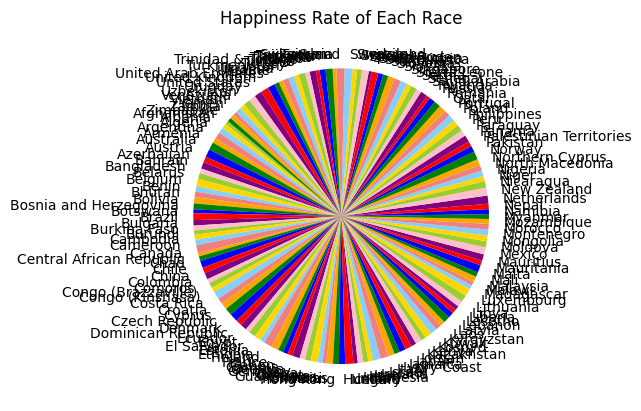

In [ ]:
import plot
# Happiness Rate of Each Race
happiness_by_region = data.groupby('Country or region')['Score'].mean()
labels = happiness_by_region.index
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange', 'green', 'blue', 'red', 'purple', 'pink']
# visualize
plt.figure(figsize=(7, 7))
plt.pie(happiness_by_region, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Happiness Rate of Each Race")
plt.show()
happiness_by_region.sort_values( ascending=False)